In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## Importing Data

### TF-IDF

In [2]:
with open('../DATA/tfidf_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_train_tfidf = data['X_train']
X_test_tfidf = data['X_test']
y_train_tfidf = data['y_train']
y_test_tfidf = data['y_test']
vectorizer_tfidf = data['vectorizer']

### Count Vectorizer

In [3]:
with open('../DATA/count_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_train_count = data['X_train']
X_test_count = data['X_test']
y_train_count = data['y_train']
y_test_count = data['y_test']
vectorizer_count = data['vectorizer']

### Train Models

In [8]:
y_train_count = np.array(y_train_count)
y_test_count =  np.array(y_test_count)
y_train_tfidf = np.array(y_train_tfidf)
y_test_tfidf =  np.array(y_test_tfidf)

tfidf_perceptrons = []
count_perceptrons = []

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Training perceptrons
for i in range(len(labels)):
    tfidf_perceptron = Perceptron()
    tfidf_perceptron.fit(X_train_tfidf, y_train_tfidf[:, i])
    tfidf_perceptrons.append(tfidf_perceptron)

    count_perceptron = Perceptron()
    count_perceptron.fit(X_train_count, y_train_count[:, i])
    count_perceptrons.append(count_perceptron)

### Comparing Models

Label: toxic
TF-IDF Perceptron Training Accuracy: 0.9493
TF-IDF Perceptron Testing Accuracy: 0.9399
Tf-IDF Perceptron F1 Score: 0.6818 

Count Perceptron Training Accuracy: 0.9442
Count Perceptron Testing Accuracy: 0.9350
Count Perceptron F1 Score: 0.6583 

Label: severe_toxic
TF-IDF Perceptron Training Accuracy: 0.9891
TF-IDF Perceptron Testing Accuracy: 0.9851
Tf-IDF Perceptron F1 Score: 0.3510 

Count Perceptron Training Accuracy: 0.9834
Count Perceptron Testing Accuracy: 0.9805
Count Perceptron F1 Score: 0.2560 

Label: obscene
TF-IDF Perceptron Training Accuracy: 0.9784
TF-IDF Perceptron Testing Accuracy: 0.9706
Tf-IDF Perceptron F1 Score: 0.7054 

Count Perceptron Training Accuracy: 0.9742
Count Perceptron Testing Accuracy: 0.9685
Count Perceptron F1 Score: 0.6798 

Label: threat
TF-IDF Perceptron Training Accuracy: 0.9982
TF-IDF Perceptron Testing Accuracy: 0.9971
Tf-IDF Perceptron F1 Score: 0.3212 

Count Perceptron Training Accuracy: 0.9938
Count Perceptron Testing Accuracy: 0

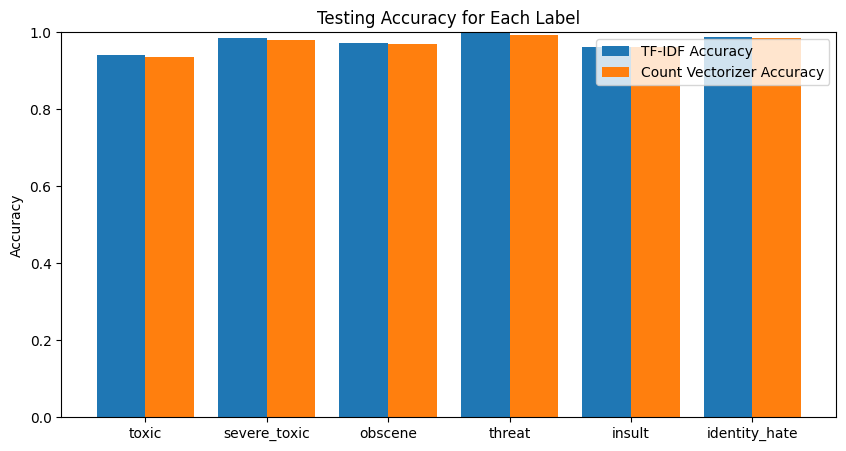

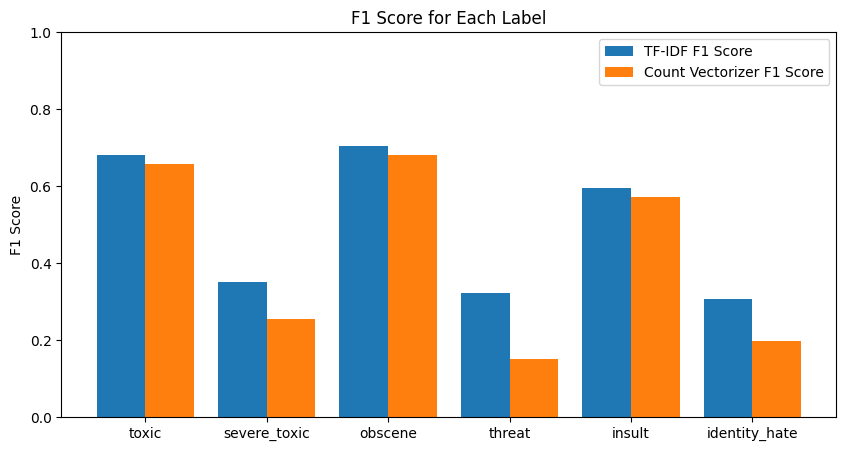

In [24]:
# Prediction matrices for each label
tfidf_preds = np.zeros_like(y_test_tfidf)
count_preds = np.zeros_like(y_test_count)

for i in range(len(labels)):
    tfidf_preds[:, i] = tfidf_perceptrons[i].predict(X_test_tfidf)
    count_preds[:, i] = count_perceptrons[i].predict(X_test_count)

# Training, testing accuracy and F1 score for each label
test_accuracies_tfidf = []
test_accuracies_count = []
f1_scores_tfidf = []
f1_scores_count = []

for i, label in enumerate(labels):
    print(f'Label: {label}')
    tfidf_train_pred = tfidf_perceptrons[i].predict(X_train_tfidf)
    tfidf_test_pred = tfidf_perceptrons[i].predict(X_test_tfidf)
    test_accuracies_tfidf.append(accuracy_score(y_test_tfidf[:, i], tfidf_test_pred))
    f1_scores_tfidf.append(f1_score(y_test_tfidf[:, i], tfidf_test_pred))
    
    print(f'TF-IDF Perceptron Training Accuracy: {accuracy_score(y_train_tfidf[:, i], tfidf_train_pred):.4f}')
    print(f'TF-IDF Perceptron Testing Accuracy: {accuracy_score(y_test_tfidf[:, i], tfidf_test_pred):.4f}')
    print(f'Tf-IDF Perceptron F1 Score: {f1_score(y_test_tfidf[:, i], tfidf_test_pred):.4f} \n')

    count_train_pred = count_perceptrons[i].predict(X_train_count)
    count_test_pred = count_perceptrons[i].predict(X_test_count)
    test_accuracies_count.append(accuracy_score(y_test_count[:, i], count_test_pred))
    f1_scores_count.append(f1_score(y_test_count[:, i], count_test_pred))
    print(f'Count Perceptron Training Accuracy: {accuracy_score(y_train_count[:, i], count_train_pred):.4f}')
    print(f'Count Perceptron Testing Accuracy: {accuracy_score(y_test_count[:, i], count_test_pred):.4f}')
    print(f'Count Perceptron F1 Score: {f1_score(y_test_count[:, i], count_test_pred):.4f} \n')

# Plots for accuracy and F1 scores
x = np.arange(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, test_accuracies_tfidf, 0.4, label='TF-IDF Accuracy')
plt.bar(x + 0.2, test_accuracies_count, 0.4, label='Count Vectorizer Accuracy')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Testing Accuracy for Each Label')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, f1_scores_tfidf, 0.4, label='TF-IDF F1 Score')
plt.bar(x + 0.2, f1_scores_count, 0.4, label='Count Vectorizer F1 Score')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Label')
plt.legend()

### Evaluating Metrics